In [1]:
# Importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and checking the first five rows of the data set
df = pd.read_csv('Demographic data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [3]:
# Total number of rows and columns in demographic data
df.shape

(71295, 12)

In [4]:
# Data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [5]:
# Total number of missing values, column wise
df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [6]:
# Missing values in percentage
round(100*(df.isnull().sum())/len(df),2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [7]:
# Checking the total counts of non-default and default cases
df['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

In [8]:
# Dropping rows with null values since we have a lot of records & imputing Performance Tag will introduce bias
# more as it's the predictor column
df.dropna(inplace = True)

In [9]:
# Column wise missing values
df.isnull().sum()

Application ID                                 0
Age                                            0
Gender                                         0
Marital Status (at the time of application)    0
No of dependents                               0
Income                                         0
Education                                      0
Profession                                     0
Type of residence                              0
No of months in current residence              0
No of months in current company                0
Performance Tag                                0
dtype: int64

In [10]:
# Remaining count of rows and column post removal of records with null value
df.shape

(69721, 12)

In [11]:
# Creating a copy of df
dd = df.copy()

### EDA

In [12]:
# Total count of credit card applicants with age lesser than 18
(df['Age'] < 18).value_counts()

False    69659
True        62
Name: Age, dtype: int64

In [13]:
# Assuming a minimum age of 18 is required to get a credit card, we'll drop the records with age < 18
df.drop(df[df['Age'] < 18].index, inplace = True)
df.shape

(69659, 12)

In [14]:
# Bining the continuous feature - Age
bins = np.arange(10, df['Age'].max()+10, 10)
df['Age_bin'] = pd.cut(df['Age'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]"


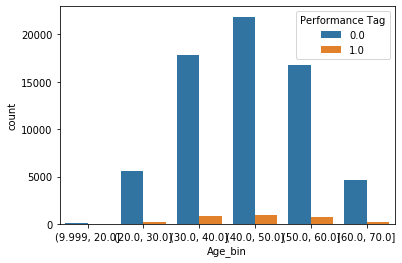

In [15]:
# Plotting Age_bin with Performance Tag
sns.countplot(data=df,x='Age_bin', hue="Performance Tag")
plt.show()

In [16]:
# Majority of default has happened from age group of 28 - 58. However we cannot assume this as the total count
# of default is very less

# Gender column
df['Gender'].value_counts()

M    53195
F    16464
Name: Gender, dtype: int64

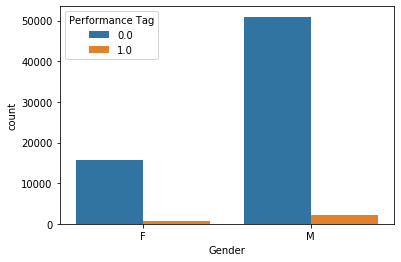

In [17]:
# Majority of applicants are male

# Plotting Gender with Performance Tag
sns.countplot(data=df,x='Gender', hue="Performance Tag")
plt.show()

In [18]:
# Males have defaulted in higher number which is due to higher number of male applicants

# Marital Status
df['Marital Status (at the time of application)'].value_counts()

Married    59388
Single     10271
Name: Marital Status (at the time of application), dtype: int64

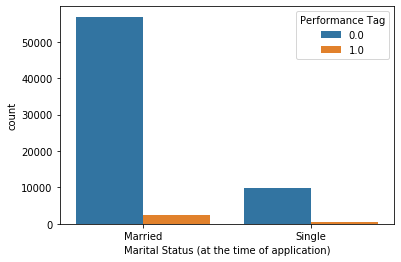

In [19]:
# Majority of applicants are Married

# Plotting Marital Status with Performance tag
sns.countplot(data = df, x = 'Marital Status (at the time of application)', hue = 'Performance Tag')
plt.show()

In [20]:
# Same result of Gender. We have more married defaulters due to higher number of married applicants

# No of dependents
df['No of dependents'].value_counts()

3.0    15591
1.0    15164
2.0    15080
4.0    11973
5.0    11851
Name: No of dependents, dtype: int64

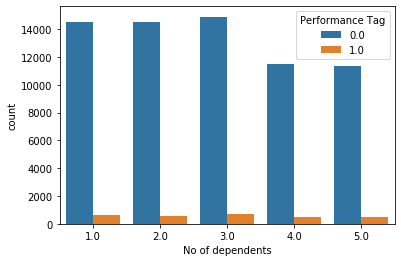

In [21]:
# We have even distribution of dependents

# Plotting dependents with Performance Tag
sns.countplot(data = df, x = 'No of dependents', hue = 'Performance Tag')
plt.show()

In [22]:
# Count of default is higher at 3 dependents but insignificant in comparison with other

# Income
df['Income'].min()

-0.5

In [23]:
# Dropping records with income less then 0, assuming that negative income is not possible
df.drop(df[df['Income'] < 0].index, inplace = True)

# Bining Income
bins = np.arange(0, df['Income'].max() + 10, 10)
df['Income_bin'] = pd.cut(df['Income'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]"


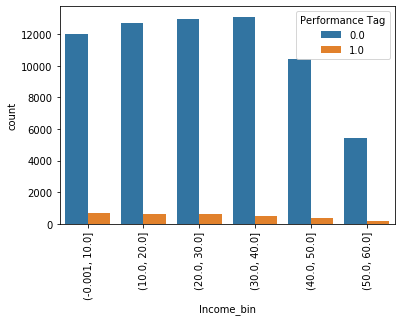

In [24]:
# Plotting Income_bin with Performance Tag
ax = sns.countplot(data = df, x = 'Income_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [25]:
# Decreasing default trend is observed with the increase in income

# Education
df['Education'].value_counts()

Professional    24312
Masters         23431
Bachelor        17265
Phd              4454
Others            117
Name: Education, dtype: int64

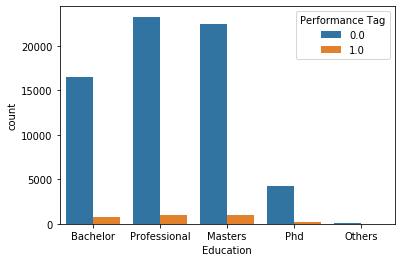

In [26]:
# Plotting education with Performance Tag
sns.countplot(data = df, x = 'Education', hue = 'Performance Tag')
plt.show()

In [27]:
# No defaulters in others, however insignificant strength for assumption.
# Count of defaulters is not significant in any education.

# Profession
df['Profession '].value_counts()

SAL        39524
SE_PROF    16177
SE         13878
Name: Profession , dtype: int64

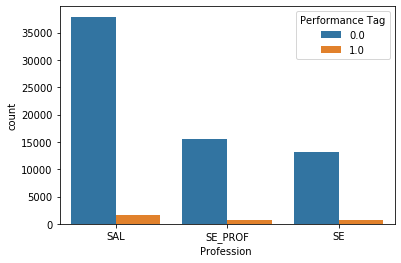

In [28]:
# Plotting Profession with Performance tag
sns.countplot(data = df, x = 'Profession ', hue = 'Performance Tag')
plt.show()

In [29]:
# SAL seems to have more defaulters but not significant

# Type of residence
df['Type of residence'].value_counts()

Rented                 52097
Owned                  13932
Living with Parents     1758
Company provided        1595
Others                   197
Name: Type of residence, dtype: int64

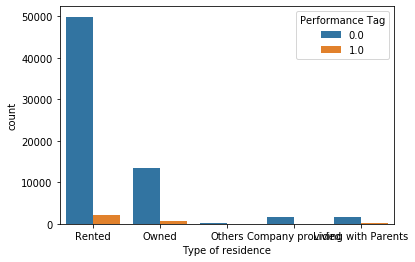

In [30]:
# Plotting Type of residence with Performance Tag
sns.countplot(data = df, x = 'Type of residence', hue = 'Performance Tag')
plt.show()

In [31]:
# Rented residence has significant number of defaulters

# No of months in current residence
(df['No of months in current residence']<1).value_counts()

False    69579
Name: No of months in current residence, dtype: int64

In [32]:
# Bining the No of months in current residence
bins = np.arange(0, df['No of months in current residence'].max() + 10, 10)
df['current_residence_bin'] = pd.cut(df['No of months in current residence'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]"


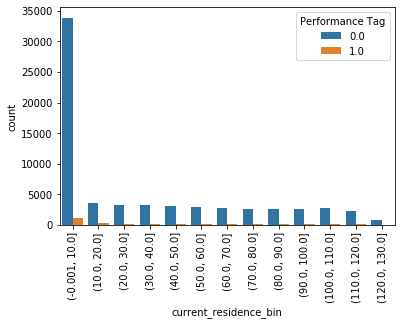

In [33]:
# Plotting the No of months in current residence with Performance Tag
ax = sns.countplot(data = df, x = 'current_residence_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [34]:
# Majority of defaulters are in 0-10 group of duration of stay

# No of months in current company
(df['No of months in current company']<1).value_counts()

False    69579
Name: No of months in current company, dtype: int64

In [35]:
# Bining the duration in current company
bins = np.arange(0, df['No of months in current company'].max() + 10, 10)
df['current_company_bin'] = pd.cut(df['No of months in current company'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


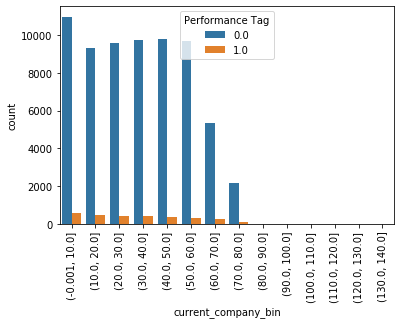

In [36]:
# Plotting No of months in current company with Performance Tag
ax = sns.countplot(data = df, x = 'current_company_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [37]:
# Here we see a trend - decrease in number defaulter with increase in experience within the same company

In [38]:
# Copying the df dataframe into woe_data
woe_data = df.copy()

In [39]:
# Dropping few columns whose bins have been created
woe_data.drop(['Age','No of months in current company','No of months in current residence'], axis = 1, inplace = True)

In [40]:
# WOE_DATA
woe_data.head()

,Application ID,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
0,954457215,F,Married,2.0,40.0,Bachelor,SAL,Rented,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
1,432830445,M,Married,4.0,55.0,Professional,SE_PROF,Rented,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
2,941387308,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
3,392161677,M,Married,1.0,53.0,Bachelor,SE,Rented,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
4,182011211,F,Married,5.0,44.0,Professional,SAL,Rented,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


In [41]:
# Function to calculate WOE & IV
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [42]:
for col in woe_data.columns:
    if col == 'Performance Tag': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df1, iv = calculate_woe_iv(woe_data, col, 'Performance Tag')
        print(df1)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Application ID


/Users/rishabhkashyap/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           Value  All  Good  Bad  Distr_Good  Distr_Bad      WoE        IV
5103   653287861    2     1    1    0.000015    0.00034 -3.12088  0.001015
0      954457215    1     1    0    0.000015    0.00000  0.00000  0.000000
46376  789481818    1     1    0    0.000015    0.00000  0.00000  0.000000
46377  253182798    1     1    0    0.000015    0.00000  0.00000  0.000000
46378  555626075    1     1    0    0.000015    0.00000  0.00000  0.000000
...          ...  ...   ...  ...         ...        ...      ...       ...
23198  925646939    1     1    0    0.000015    0.00000  0.00000  0.000000
23199  344619950    1     1    0    0.000015    0.00000  0.00000  0.000000
23200  869773383    1     1    0    0.000015    0.00000  0.00000  0.000000
23186  615487774    1     1    0    0.000015    0.00000  0.00000  0.000000
69575   37493797    1     1    0    0.000015    0.00000  0.00000  0.000000

[69576 rows x 8 columns]
IV score: 0.00


WoE and IV for column: Gender
  Value    All   Good   Bad

#### The important features based on Information Value are - 
- current_residence_bin
- Income_bin
- current_company_bin

In [43]:
# Copying the earlier dataframe
df2 = df.copy()

### Data Preparation

In [44]:
# Removing features as per IV
df2.drop(['Age_bin','Income_bin','current_residence_bin','current_company_bin'], axis=1, inplace=True)
df2.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [45]:
# Removing features as per IV
df2.drop(['Age','Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ',
         'Type of residence'], axis=1, inplace=True)
df2.head()

,Application ID,Income,No of months in current residence,No of months in current company,Performance Tag
0,954457215,40.0,113,56,0.0
1,432830445,55.0,112,46,0.0
2,941387308,46.0,104,49,0.0
3,392161677,53.0,94,53,0.0
4,182011211,44.0,112,43,0.0


In [46]:
df2 = df2.set_index('Application ID')

In [47]:
# Importing library to split the data set into train and test
from sklearn.model_selection import train_test_split

In [48]:
# Every other feature except Performance Tag in X
X = df2.drop(['Performance Tag'], axis=1)

# Storing performance tag in y
y = df2['Performance Tag']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

#### Scaling

In [50]:
# Importing library for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the train data
df2_train = scaler.fit_transform(X_train)

In [51]:
# Scaling the test data
df2_test = scaler.transform(X_test)

### Modelling

In [52]:
# Importing statsmodels for statistical summary
import statsmodels.api as sm

In [53]:
# Importing Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
# Fitting the model - Model 1
logm1 = sm.GLM(y_train,(sm.add_constant(df2_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48705
Model:                            GLM   Df Residuals:                    48701
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8384.2
Date:                Sun, 01 Mar 2020   Deviance:                       16768.
Time:                        13:23:08   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1598      0.023   -136.183      0.000      -3.205      -3.114
x1            -0.1996      0.023     -8.506      0.000      -0.246      -0.154
x2             0.0536      0.022      2.408      0.016       0.010       0.097
x3            -0.1067      0.023     -4.629      0.000      -0.152      -0.061
==============================================================================
"""

In [66]:
# Fitting the model - Model 2
logistic = LogisticRegression(class_weight = 'balanced')

logistic.fit(df2_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Importing library
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [71]:
# Predict default for test data
y_pred = logistic.predict(df2_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensiticity: \t", round(sensitivity,2),'\n','Specificity: \t',round(specificity,2), sep = '')

# check area under curve
y_pred_prob = logistic.predict_proba(df2_test)[:,1]
print('AUC: \t',round(roc_auc_score(y_test, y_pred_prob),2))

[[10780  9183]
 [  408   503]]
Sensiticity: 	0.55
Specificity: 	0.54
AUC: 	 0.57


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69     19963
         1.0       0.05      0.55      0.09       911

    accuracy                           0.54     20874
   macro avg       0.51      0.55      0.39     20874
weighted avg       0.92      0.54      0.67     20874

